#### Import functions ####

In [21]:
from ipynb.fs.full.utilities_v2 import *

#### Replication timing plots ####

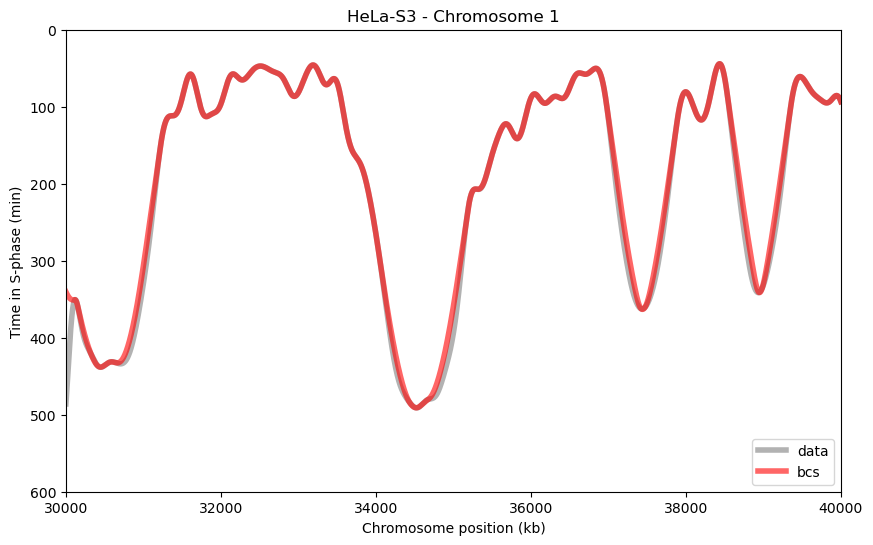

In [2]:
cell_line = "HeLa-S3"
chr_number = 1
chrpos_min = 30000
chrpos_max = 40000
scale_factor = 6
file_name = f'{cell_line}_chr[{chr_number}]_{chrpos_min}-{chrpos_max}'
spec_fileQ = False
saveQ = False
rt_plotf(cell_line,chr_number,chrpos_min,chrpos_max,scale_factor,file_name,spec_fileQ,saveQ)

#### Firing rate plots ####

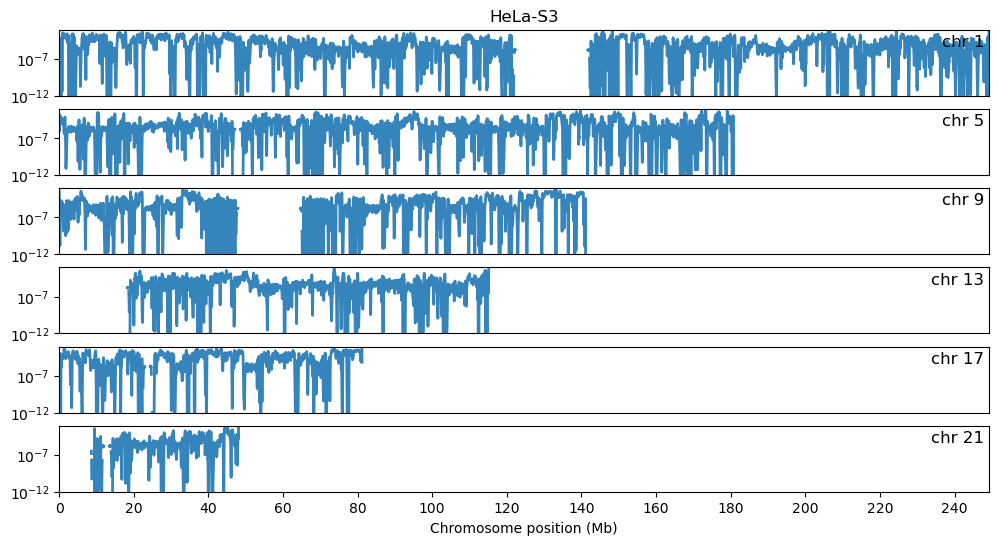

In [3]:
cell_line = 'HeLa-S3'
chr_numbers = range(1, 23, 4)
resolution = 1000
file_name = 'firing_rates_plot'
saveQ = False
fire_plotf(cell_line,chr_numbers,resolution,file_name,saveQ,aspect_ratio=(12, len(chr_numbers)))

#### Plotting error across chromosomes ####

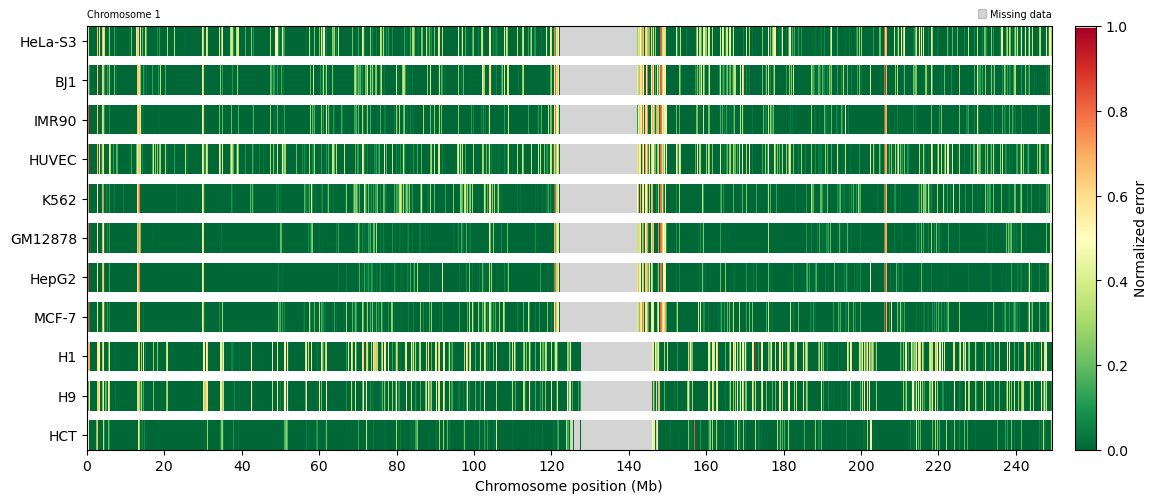

In [4]:
plot_goodness_of_fit(chr_number=1, saveQ=False)

#### KDE plots ####

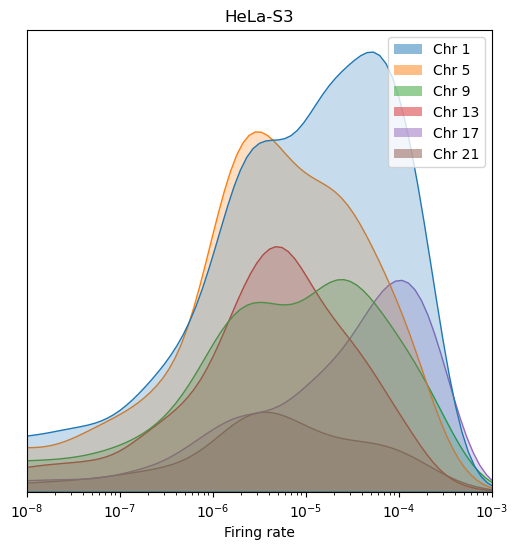

In [5]:
# Data per chromosome
cell_line = 'HeLa-S3'
chr_numbers = range(1,23,4)
data_type = "fire_rates"

firing_rates_list = [load_function(cell_line, chr_number, data_type) for chr_number in chr_numbers]
labels = [f'Chr {chr_number}' for chr_number in chr_numbers]

plot_relative_kdes(firing_rates_list, labels, log_scale=True, x_min=10**-8, x_max=10**-3,
                  plot_title=cell_line, x_title=title_map[data_type],
                   bw_adjust=1, saveQ=False)

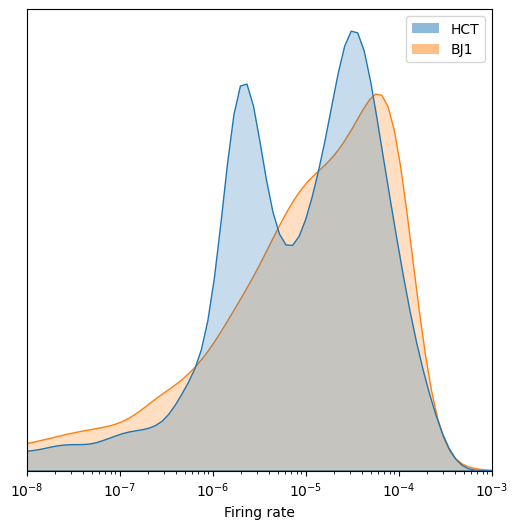

In [6]:
# Data per cell line

cell_lines = ['HCT', 'BJ1']
chr_numbers = range(1,23,24)
data_type = "fire_rates"

firing_rates_list = []
for cell_line in cell_lines:
    firing_rates_list0 = [load_function(cell_line, chr_number, data_type) for chr_number in chr_numbers]
    firing_rates_list.append(np.array([item for sublist in firing_rates_list0 for item in sublist]))
labels = cell_lines

plot_relative_kdes(firing_rates_list, labels, log_scale=True, x_min=10**-8, x_max=10**-3,
                   plot_title="", x_title=title_map[data_type],
                   bw_adjust=1, saveQ=False)

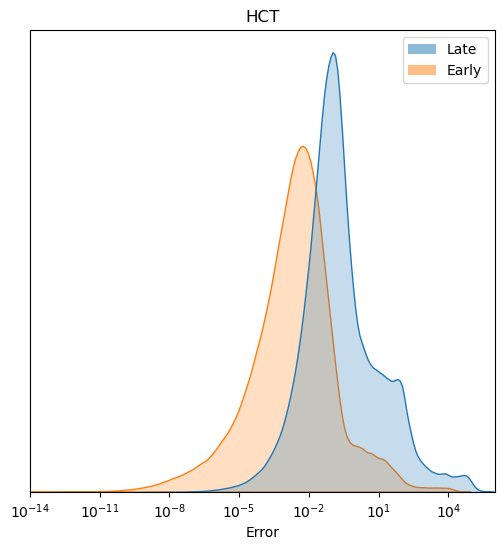

In [7]:
# Late vs early replication

cell_line = "HCT"
chr_numbers = range(1,23)
data_type = "error"

t_early = 300
t_late = 300

data_all = []

data_late = []
for chr_number in chr_numbers:
    data_time = load_function(cell_line, chr_number, "time_data")
    positions_late = [pos for pos, value in enumerate(data_time) if value > t_late]
    data = load_function(cell_line, chr_number, data_type)
    data_late.extend(data[pos] for pos in positions_late)
data_all.append(np.array(data_late))

data_late = []
for chr_number in chr_numbers:
    data_time = load_function(cell_line, chr_number, "time_data")
    positions_late = [pos for pos, value in enumerate(data_time) if value < t_early]
    data = load_function(cell_line, chr_number, data_type)
    data_late.extend(data[pos] for pos in positions_late)
data_all.append(np.array(data_late))

labels = ["Late", "Early"]

plot_relative_kdes(data_all, labels, log_scale=True, x_min=10**-14, x_max=10**6,
                   plot_title=cell_line, x_title=title_map[data_type], normalize=False,
                   bw_adjust=1, saveQ=False)

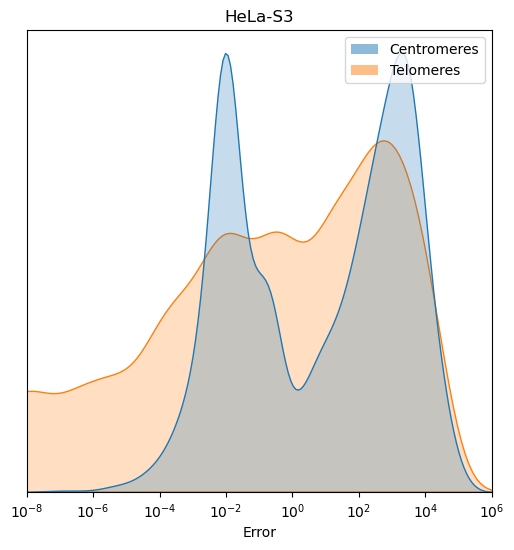

In [8]:
# Centromeres and telomeres

cell_line = "HeLa-S3"
chr_numbers = range(1,23)
data_type = "error"

data_all = []

data_centromeres = []
for chr_number in chr_numbers:
    positions_centromeres = load_function_pos(chr_number, "centromeres")
    data = load_function(cell_line, chr_number, data_type)
    data_centromeres.extend(data[pos] for pos in positions_centromeres)
data_all.append(np.array(data_centromeres))

data_telomeres = []
for chr_number in chr_numbers:
    positions_telomeres = load_function_pos(chr_number, "telomeres")
    data = load_function(cell_line, chr_number, data_type)
    data_telomeres.extend(data[pos] for pos in positions_telomeres) 
data_all.append(np.array(data_telomeres))

labels = ["Centromeres", "Telomeres"]

plot_relative_kdes(data_all, labels, log_scale=True, x_min=10**-8, x_max=10**6,
                   plot_title=cell_line, x_title=title_map[data_type], normalize=False,
                   bw_adjust=1, saveQ=False)

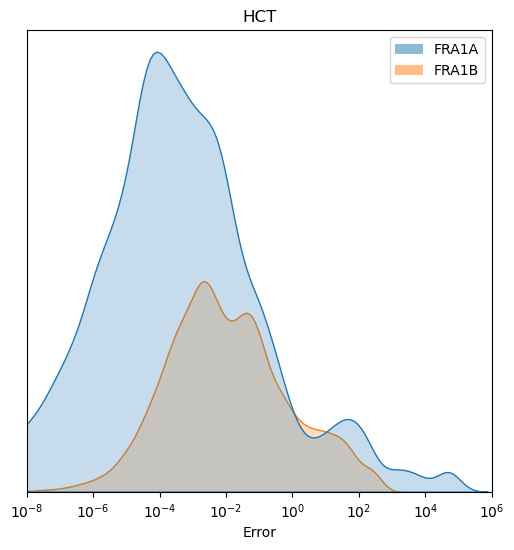

In [9]:
# Fragile sites

cell_line = "HCT"
chr_numbers = [1]
data_type = "error"
site_letters = ['A','B']

data_all = []
labels = []

for site_letter in site_letters:
    data_fragile_sites = []
    for chr_number in chr_numbers:
        positions_fragile_sites = load_function_pos(chr_number, "fragile_sites", site_letter=site_letter)
        data = load_function(cell_line, chr_number, data_type)
        data_fragile_sites.extend(data[pos] for pos in positions_fragile_sites)
    data_all.append(np.array(data_fragile_sites))
    labels.append(f'FRA{chr_number}{site_letter}')

plot_relative_kdes(data_all, labels, log_scale=True, x_min=10**-8, x_max=10**6,
                   plot_title=cell_line, x_title=title_map[data_type], normalize=False,
                   bw_adjust=1, saveQ=False)

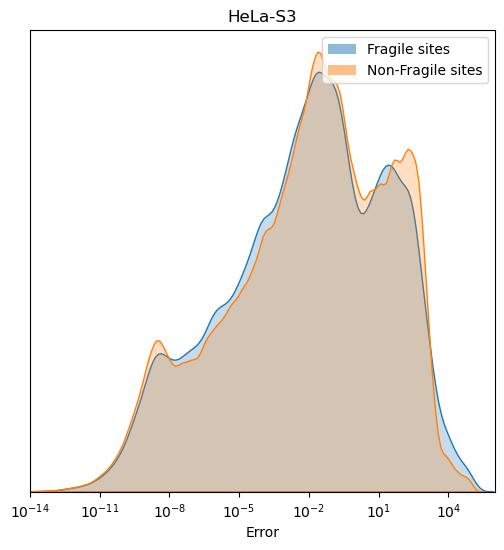

In [10]:
# Fragile sites vs non-fragile sites

cell_line = "HeLa-S3"
chr_numbers = [1,2,3]
data_type = "error"
site_letters = list(string.ascii_uppercase[:13])

data_all = []
labels = []
data_fragile_sites = []
for site_letter in site_letters:
    for chr_number in chr_numbers:
        positions_fragile_sites = load_function_pos(chr_number, "fragile_sites", site_letter=site_letter)
        data = load_function(cell_line, chr_number, data_type)
        data_fragile_sites.extend(data[pos] for pos in positions_fragile_sites)
data_all.append(np.array(data_fragile_sites))

data_non_fragile_sites = []
for site_letter in site_letters:
    for chr_number in chr_numbers:
        positions_fragile_sites = load_function_pos(chr_number, "fragile_sites", site_letter=site_letter)
        positions_non_fragile_sites = list(set(range(0,chr_lengths[chr_number-1])) - set(positions_fragile_sites))
        data = load_function(cell_line, chr_number, data_type)
        data_non_fragile_sites.extend(data[pos] for pos in positions_non_fragile_sites)
data_all.append(np.array(data_non_fragile_sites))

labels = ["Fragile sites", "Non-Fragile sites"]

plot_relative_kdes(data_all, labels, log_scale=True, x_min=10**-14, x_max=10**6,
                   plot_title=cell_line, x_title="Error",normalize=True,
                   bw_adjust=1, saveQ=False)

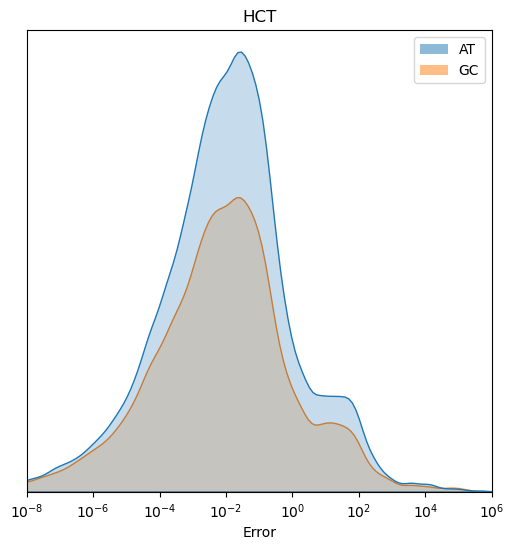

In [11]:
# Base sites

cell_line = "HCT"
chr_numbers = [1]
data_type = "error"
bases = ['A', 'T', 'G', 'C']

data_all = []
labels = []

for base in bases:
    data_bases = []
    for chr_number in chr_numbers:
        positions_bases = load_function_pos(chr_number, "bases", base=base)
        data = load_function(cell_line, chr_number, data_type)
        data_bases.extend(data[pos] for pos in positions_bases)
    data_all.append(np.array(data_bases))

data_all = [np.array(list(data_all[0]) + list(data_all[1])), np.array(list(data_all[2]) + list(data_all[3]))]

labels = ["AT", "GC"]

plot_relative_kdes(data_all, labels, log_scale=True, x_min=10**-8, x_max=10**6,
                   plot_title=cell_line, x_title=title_map[data_type], normalize=False,
                   bw_adjust=1, saveQ=False)

#### Data vs data scatter plots ####

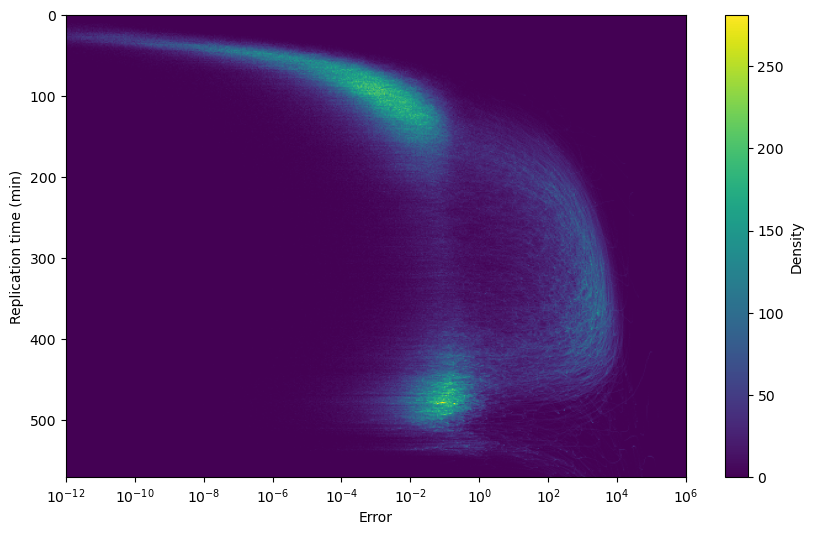

In [12]:
# Example usage
generate_plot(
    load_type1="time_data", load_type2="error",
    cell_line="H1", chr_numbers=range(1,23),
    show_telomeres=False, show_centromeres = False, show_fragile_sites=False,
    xmin=1e-12, xmax=1e6,
    ymin=0, ymax=570,
    log_x=True, log_y=False,
    use_density=True,
    dpi=100,
    map_to_white=False,
    saveQ=False
)

#### BCS output ####

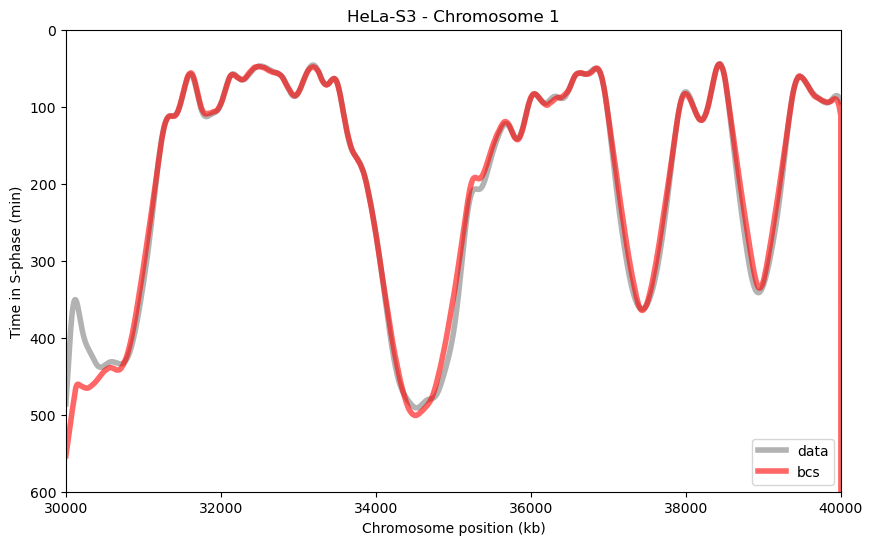

In [13]:
# Replication timing
cell_line = "HeLa-S3"
chr_number = 1
chrpos_min = 30000
chrpos_max = 40000
scale_factor = 6
file_name = f'{cell_line}_chr[{chr_number}]_{chrpos_min}-{chrpos_max}'
spec_fileQ = False
saveQ = False
rt_plotf(cell_line,chr_number,chrpos_min,chrpos_max,scale_factor,file_name,spec_fileQ,saveQ, simQ=True)

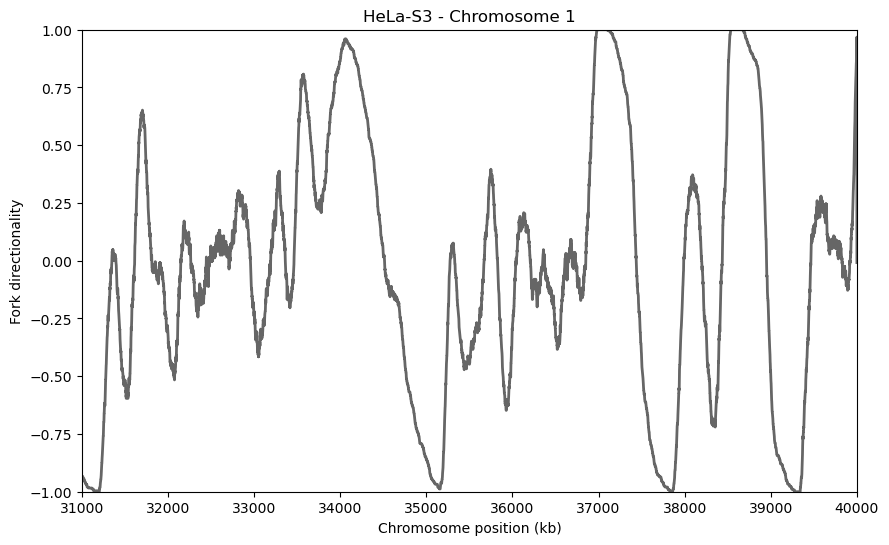

In [14]:
# Fork directionality
cell_line = "HeLa-S3"
chr_number = 1
chrpos_min = 31000
chrpos_max = 40000
file_name = f'{cell_line}_chr[{chr_number}]_{chrpos_min}-{chrpos_max}'
spec_fileQ = False
saveQ = False
forkd_plotf(cell_line,chr_number,chrpos_min,chrpos_max,file_name,spec_fileQ,saveQ)

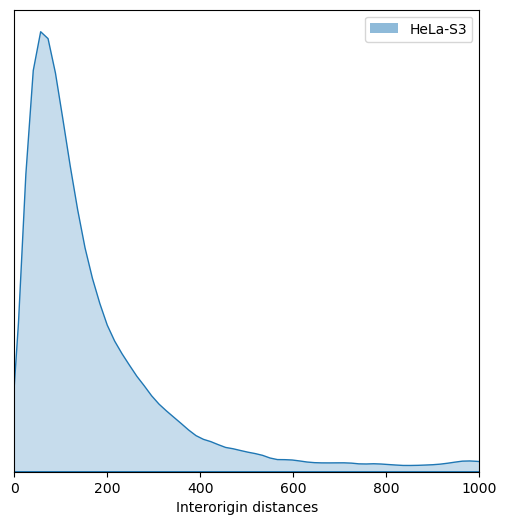

In [15]:
# Interorigin distances

cell_lines = ["HeLa-S3"]
chr_numbers = [1]
average_iod_data(cell_lines, chr_numbers, 5, show_per_cell_line=False)
data_type = "error"


data_iod = np.array(average_iod_data(cell_lines, chr_numbers, 0, show_per_cell_line=False))
labels = cell_lines

plot_relative_kdes([data_iod[0][:int(len(data_iod[0])//1.5)]], labels, log_scale=False, x_min=0, x_max=1000,
                  plot_title="", x_title="Interorigin distances",
                   bw_adjust=.5, saveQ=False)

#### Ideograms ####

In [ ]:
chr7:79,959,651-86,650,834

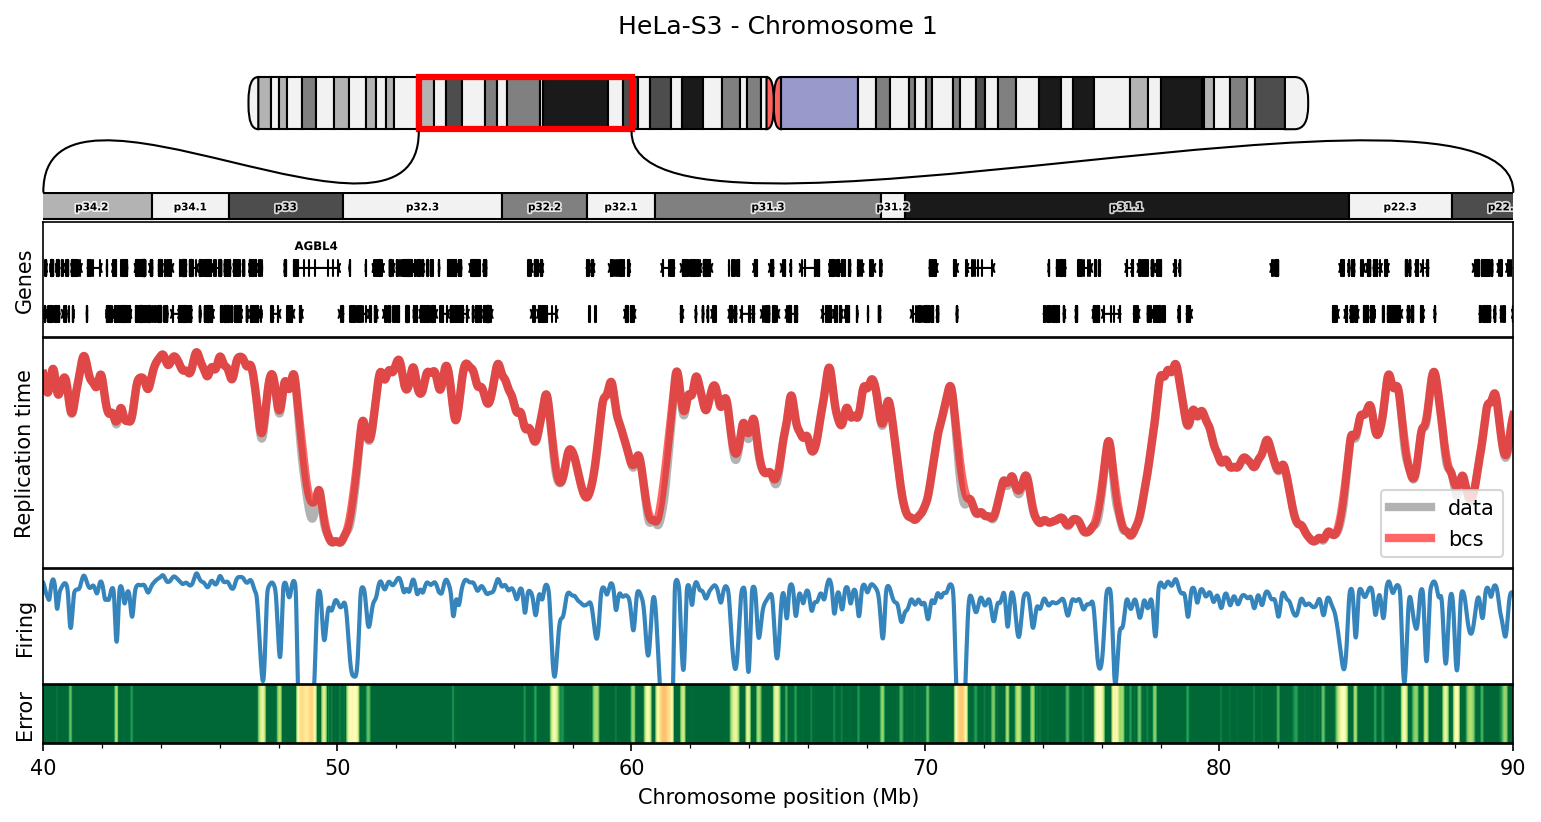

In [30]:
# Example usage:
show_genome("HeLa-S3", 1, 40000, 90000,
            show_genes_allQ=True, show_genes_bandsQ=True, show_genesQ=True,
            show_rt_plotQ=True, show_fire_plotQ=True, show_forkd_plotQ=False, show_error_plotQ=False, show_error_heat_plotQ=True,
            show_axisQ=True)